# Stock prediction with deep learning



## EDA
 In this section I will read the datasets and perform some EDA actions on data to have a better image. I visualise the distribution of data and correlation between "Open" and "Close" price. As well I compare "High" and "Close" prices and figure out the seasonal trends in datasets.

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
Dowjones = pd.read_csv('chasewillden-stock-market-from-a-high-level/DowJones.csv',index_col='Date' )
Nasdaq = pd.read_csv('chasewillden-stock-market-from-a-high-level/Nasdaq.csv',index_col='Date' )
SP500 = pd.read_csv('chasewillden-stock-market-from-a-high-level/SP500.csv',index_col='Date' )

In [14]:
Dowjones.head(4)

,Value
Date,
1977-09-02,872.31
1977-09-09,857.04
1977-09-16,856.81
1977-09-23,839.14


In [26]:
Nasdaq.head(4)

,Value
Date,
1977-09-02,100.83
1977-09-09,100.91
1977-09-16,100.74
1977-09-23,99.57


In [27]:
SP500.head(4)

,Value
Date,
1977-09-02,97.45
1977-09-09,96.37
1977-09-16,96.48
1977-09-23,95.04


In [15]:
#see the description of datasets
Dowjones.describe()

,Value
count,2082.000000
mean,7284.248833
std,5546.322304
min,747.310000
25%,2041.787500
50%,7580.870000
75%,10991.700000
max,22092.810000


In [28]:
#see the description of datasets
Nasdaq.describe()

,Value
count,2083.000000
mean,1652.703695
std,1490.111816
min,97.210000
25%,375.650000
50%,1337.520000
75%,2434.870000
max,6387.750000


In [29]:
#see the description of datasets
SP500.describe()

,Value
count,2084.000000
mean,843.222778
std,624.002075
min,87.450000
25%,264.235000
50%,830.850000
75%,1291.420000
max,2476.830000


As it shows there is a high difference between min and max values for all the columns, and most of data is close to mean value.

In [6]:
Dowjones.isnull().sum()

Value    0
dtype: int64

In [30]:
Nasdaq.isnull().sum()

Value    0
dtype: int64

In [31]:
SP500.isnull().sum()

Value    0
dtype: int64

There is no null value in this dataset

In [32]:
Dowjones.dtypes

Value    float64
dtype: object

In [33]:
def hist(df, name):
    fig = px.histogram(Dowjones, 
                   x='Value', 
                   marginal='box', 
                   nbins=50, 
                   title='Distribution of Value {}'.format(name))
    fig.update_layout(bargap=0.2)
    

In [34]:
hist(Dowjones,'Dowjones')

In [35]:
hist(Nasdaq,'NASDAQ')

In [36]:
hist(SP500,'S&P500')

In [40]:
def plot_dist(df,name,years=['2010','2017']):
    df[years[0]:years[1]].plot(subplots=True,figsize=(12,8))
    plt.title('{} Distribution from {} to {}'.format(name,years[0],years[1]))

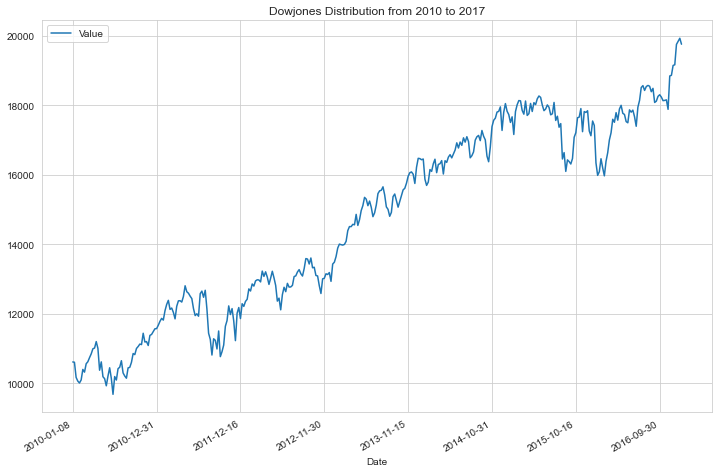

In [42]:
plot_dist(Dowjones, 'Dowjones')


In [43]:
plot_dist(Nasdaq, 'NASDAQ')


KeyError: '2010'

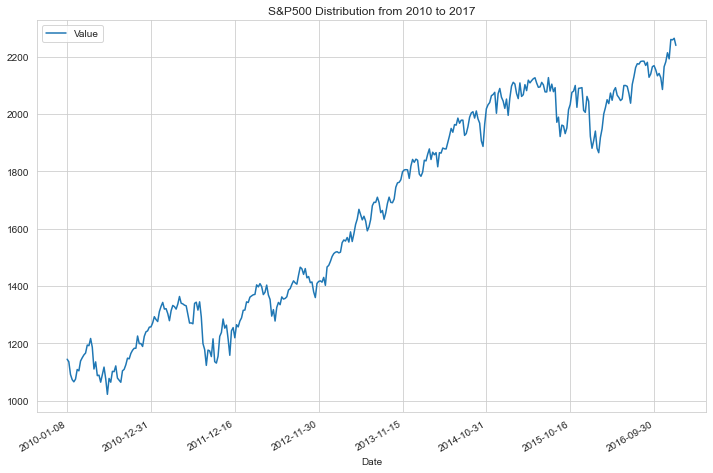

In [44]:
plot_dist(SP500, 'S&P500')

In [45]:
def normalised_df(df,name):
    df_normalised = df.Value.div(df.Value.iloc[0]).mul(100)
    df_normalised.plot(figsize=(12,6))
    plt.title('{} Normalised Value plot'.format(name))

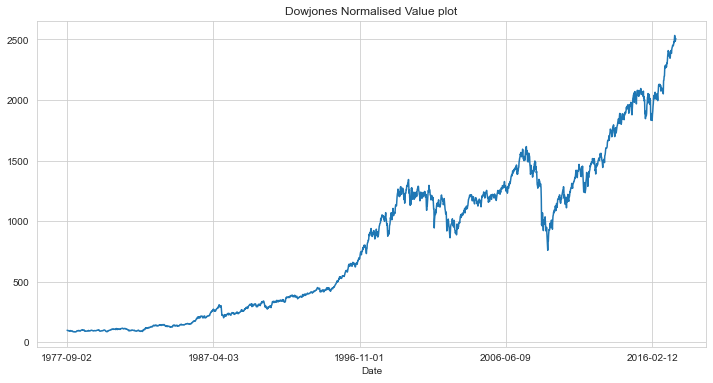

In [46]:
normalised_df(Dowjones,'Dowjones')

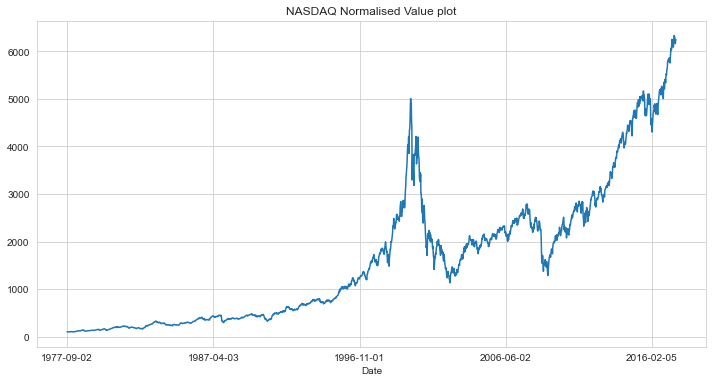

In [47]:
normalised_df(Nasdaq,'NASDAQ')

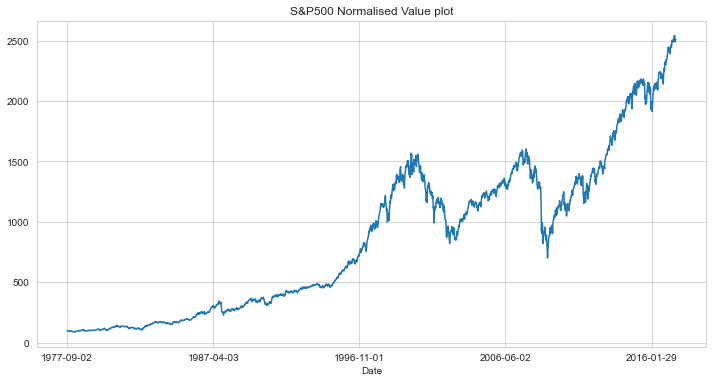

In [48]:
normalised_df(SP500,'S&P500')

In [49]:
#expanding window functions
def expanding_win(df,name):
    df_expanding_mean = df.Value.expanding().mean()
    df_expanding_std = df.Value.expanding().std()

    df.Value.plot(figsize=(12,6))
    df_expanding_mean.plot()
    df_expanding_std.plot()
    plt.legend(['Value','Mean Value','Std Value'])
    plt.title('{} Expanding Mean and std'.format(name))

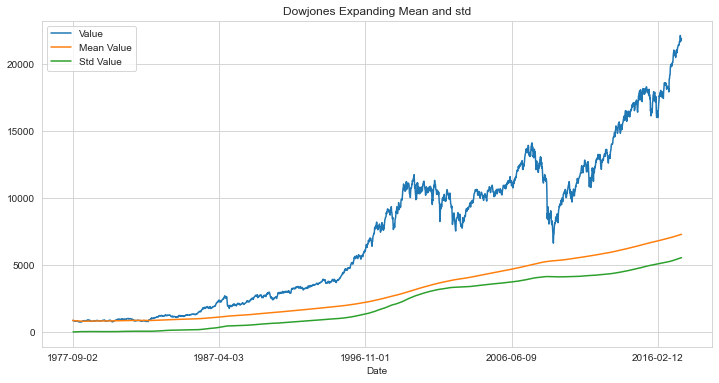

In [50]:
expanding_win(Dowjones,'Dowjones')

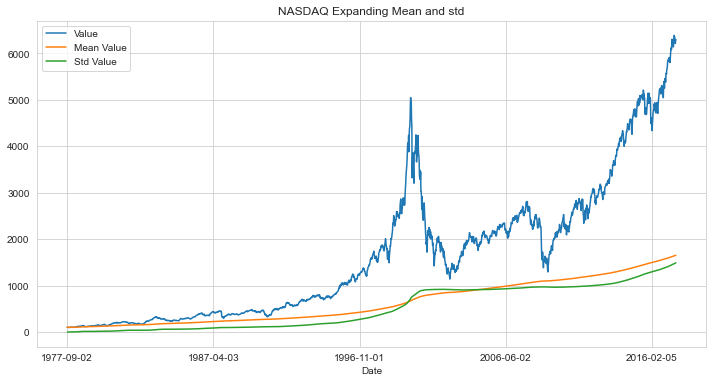

In [51]:
expanding_win(Nasdaq,'NASDAQ')

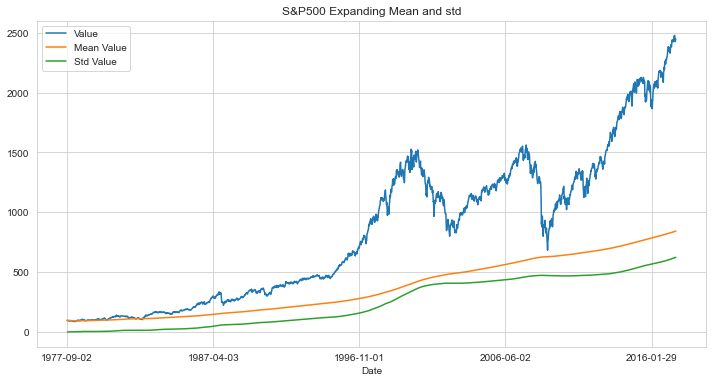

In [52]:
expanding_win(SP500,'S&P500')

### Trend Plots

In [54]:
from pylab import rcParams
import statsmodels.api as sm


In [55]:
def plot_trend(df, value):
    rcParams['figure.figsize'] = 11, 9
    decomposed_df = sm.tsa.seasonal_decompose(df[value],period=360) # The frequncy is annual
    figure = decomposed_df.plot()


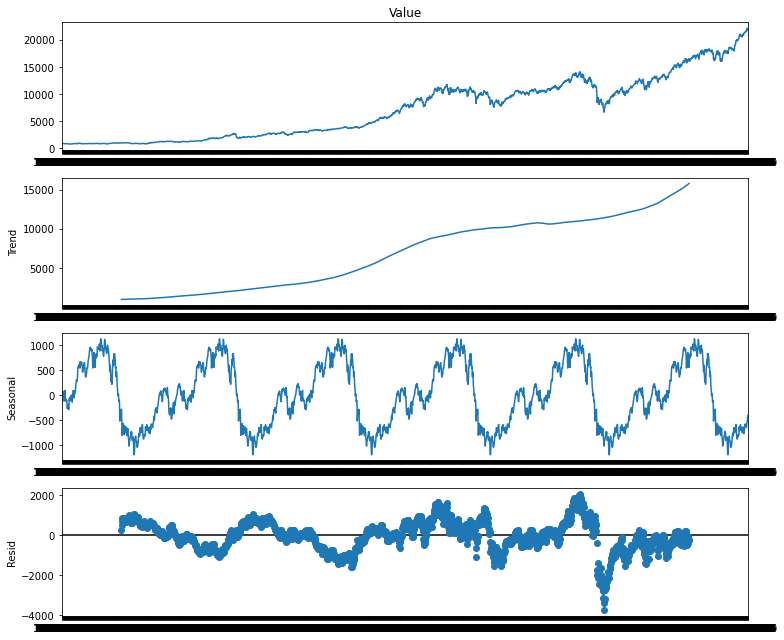

In [57]:
plot_trend(Dowjones,'Value')

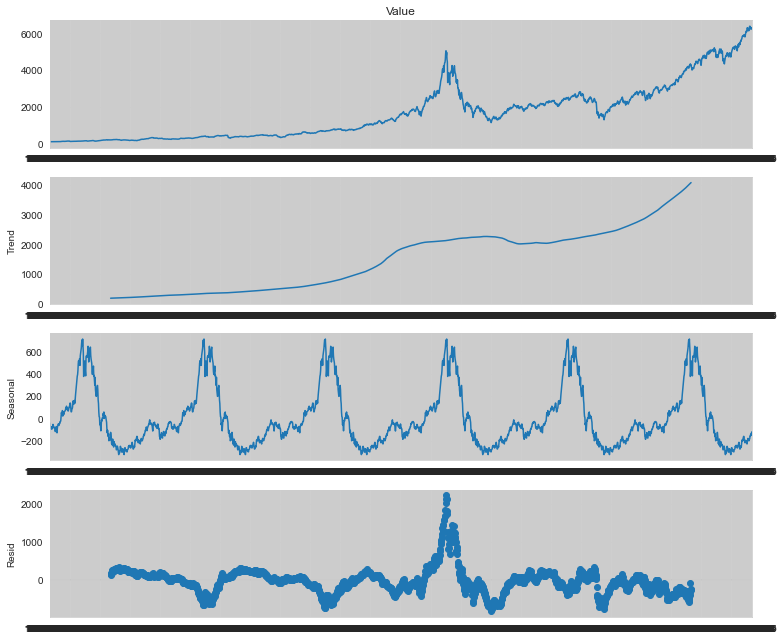

In [56]:
plot_trend(Nasdaq,'Value')

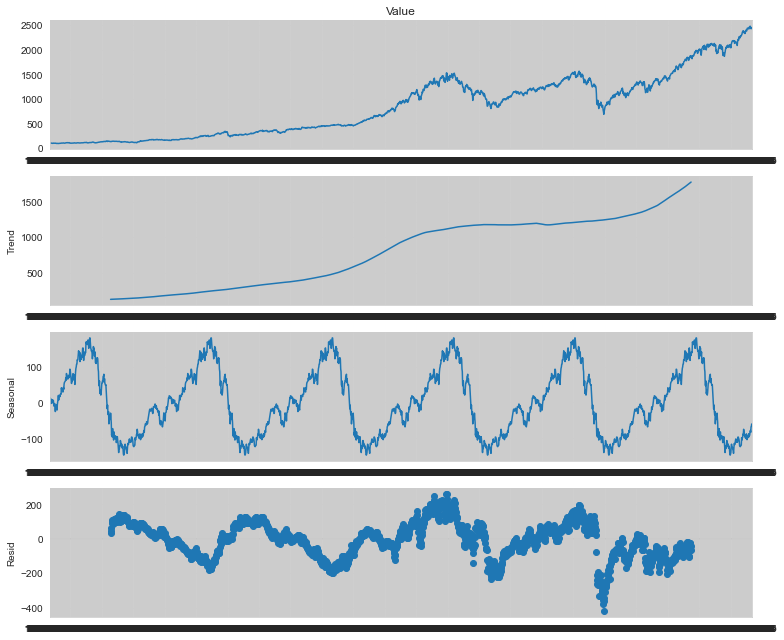

In [57]:
plot_trend(SP500,'Value')

## Stock Prediction
Stock prices in nature are time series. in order to predict stock prices for this example I want to use LSTM model. LSTMs stands for " Long short term memory" are recurrent neural networks that have a longer memory and they are well used to predict time series.

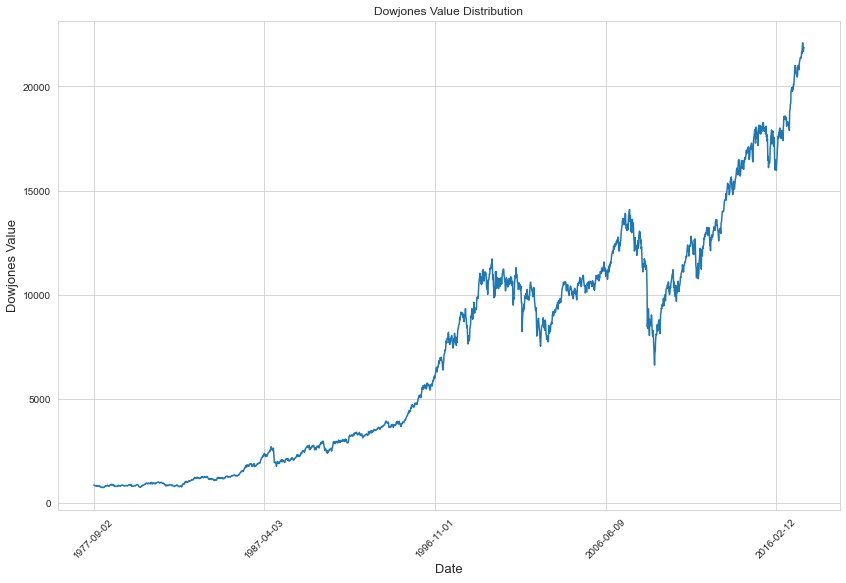

In [7]:
#Dowjones value dist
Dow = Dowjones.reset_index()
sns.set_style(style='whitegrid')
plt.figure(figsize=(14,9))
plt.plot(Dow['Value'])
plt.xticks(range(0,Dow.shape[0],500),Dow['Date'].loc[::500],rotation=45)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Dowjones Value', fontsize=13)
plt.title('Dowjones Value Distribution')
plt.show()

In [3]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

C:\Users\Arsene\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
dows_copy = Dowjones.copy()
nas_copy = Nasdaq.copy()
sp500_copy = SP500.copy()

In [5]:
#train test split
# Split train data and test data
def train_test_split (df , train_s = .8):
    train_size = int(len(df)*train_s)
    train_data = df.iloc[:train_size]
    test_data = df.iloc[train_size:]
    return train_data, test_data
train_dows, test_dows = train_test_split(dows_copy,.8)
train_nas, test_nas = train_test_split(nas_copy,.8)
train_sp500, test_sp500 = train_test_split(sp500_copy,.8)

In [11]:
dows_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2082 entries, 1977-09-02 to 2017-08-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   2082 non-null   float64
dtypes: float64(1)
memory usage: 32.5+ KB


In [41]:
#scaling data
def scaling(train,test):
    scaler = MinMaxScaler().fit(train)
    train_scaled  = scaler.transform(train)
    test_scaled = scaler.transform(test)
    return train_scaled,test_scaled,scaler
    
train_dows_scaled , test_dows_scaled, scaler_dows = scaling(train_dows,test_dows)
train_nas_scaled , test_nas_scaled, scaler_nas = scaling(train_nas,test_nas)
train_sp500_scaled , test_sp500_scaled, scaler_sp500 = scaling(train_sp500,test_sp500)

In [7]:
train_dows_scaled.shape

(1665, 1)

In [10]:
test_nas_scaled.shape

(417, 1)

In [9]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xd, yd = [], []
 
    for i in range(len(X)-look_back):
        Xd.append(X[i:i+look_back])
        yd.append(X[i+look_back])
 
    return np.array(Xd), np.array(yd)


LOOK_BACK = 20

X_train_dow, y_train_dow = create_dataset(train_dows_scaled,LOOK_BACK)
X_test_dow, y_test_dow = create_dataset(test_dows_scaled,LOOK_BACK)

X_train_nas, y_train_nas = create_dataset(train_nas_scaled,LOOK_BACK)
X_test_nas, y_test_nas = create_dataset(test_nas_scaled,LOOK_BACK)

X_train_sp500, y_train_sp500 = create_dataset(train_sp500_scaled,LOOK_BACK)
X_test_sp500, y_test_sp500 = create_dataset(test_sp500_scaled,LOOK_BACK)

# Print data shape
print('X_train.shape:', X_train_nas.shape)
print('y_train.shape:' , y_train_nas.shape)
print('X_test.shape: ', X_test_nas.shape) 
print('y_test.shape: ', y_test_nas.shape)

X_train.shape: (1646, 20, 1)
y_train.shape: (1646, 1)
X_test.shape:  (397, 20, 1)
y_test.shape:  (397, 1)


In [28]:
# Create GRU model and training
def gru_model(units, X_train):
    model = tf.keras.Sequential([
        #Input layer
        tf.keras.layers.GRU(units, 
                             return_sequences=True,
                             input_shape = [X_train.shape[1],X_train.shape[2]]),
        tf.keras.layers.Dropout(0.2),
        
        #Hidden layer
        tf.keras.layers.GRU(units),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=1)
    ])
   
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    
    
#     model.save(r'D:/sam/Saved Models/GRU/{}'.format(df)
    return model
model_gru_dow = gru_model(64,X_train_dow)
model_gru_nas = gru_model(64,X_train_nas)
model_gru_sp500 = gru_model(64,X_train_sp500)

In [29]:
def train_model(model, X_train,y_train):
    early_stopping  =tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                      patience = 8)
    fitted_model = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, 
                        shuffle = False, 
                        callbacks = [early_stopping])
    return fitted_model

In [30]:
model_gru_dows_fitted = train_model(model_gru_dow,X_train_dow, y_train_dow)

Epoch 1/100
83/83 [==============================] - 5s 23ms/step - loss: 0.0017 - val_loss: 0.00490698e
Epoch 2/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 3/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0041 - val_loss: 0.0127
Epoch 4/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0078 - val_loss: 0.0297
Epoch 5/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0087 - val_loss: 0.0288
Epoch 6/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0083 - val_loss: 0.0172
Epoch 7/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0093 - val_loss: 0.0038
Epoch 8/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0088 - val_loss: 0.0035
Epoch 9/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0072 - val_loss: 0.0046
Epoch 10/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0048 - val_loss: 0

In [31]:
model_gru_nas_fitted = train_model(model_gru_nas,X_train_nas, y_train_nas)

Epoch 1/100
83/83 [==============================] - 6s 24ms/step - loss: 0.0012 - val_loss: 0.0206
Epoch 2/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0044 - val_loss: 0.0373
Epoch 3/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0055 - val_loss: 0.0419
Epoch 4/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0133 - val_loss: 0.0142
Epoch 5/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0201 - val_loss: 0.0049
Epoch 6/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0205 - val_loss: 0.0100
Epoch 7/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0177 - val_loss: 0.0102
Epoch 8/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 9/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0023 - val_loss: 1.9479e-04
Epoch 10/100
83/83 [==============================] - 1s 16ms/step - loss: 8.7999e-04 - val_loss

In [32]:
model_gru_sp500_fitted = train_model(model_gru_sp500,X_train_sp500, y_train_sp500)

Epoch 1/100
83/83 [==============================] - 6s 23ms/step - loss: 0.0018 - val_loss: 0.0117
Epoch 2/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0031 - val_loss: 0.0173
Epoch 3/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0063 - val_loss: 0.0335
Epoch 4/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0085 - val_loss: 0.0404
Epoch 5/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0089 - val_loss: 0.0287
Epoch 6/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0096 - val_loss: 0.0371
Epoch 7/100
83/83 [==============================] - 1s 16ms/step - loss: 0.0100 - val_loss: 0.0231
Epoch 8/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0134 - val_loss: 0.0423
Epoch 9/100
83/83 [==============================] - 1s 16ms/step - loss: 0.0156 - val_loss: 0.0376


## Saving the model on disk

In [ ]:
import pickle
def save_model(model, df_name):
    output = 'GRU_{}'.format(df_name)
    with open(output, 'wb') as f_out:
        pickle.dump(model,f_out)
    

## Loading the model

In [ ]:
import pickle
def load_model(file,df_name):
    in_put = 'GRU_{}'.format(df_name) 
    with open(in_put, 'rb') as f_in:
        model = pickle.load(f_in)
    return model

In [33]:
model_gru_sp500

In [34]:
#inverse the scale 
def inverse_scaled(y_test,y_train):
    y_test = scaler.inverse_transform(y_test)
    y_train = scaler.inverse_transform(y_train)
    return y_test,y_train

In [20]:
def plot_loss (model, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Train vs Validation Loss for' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')


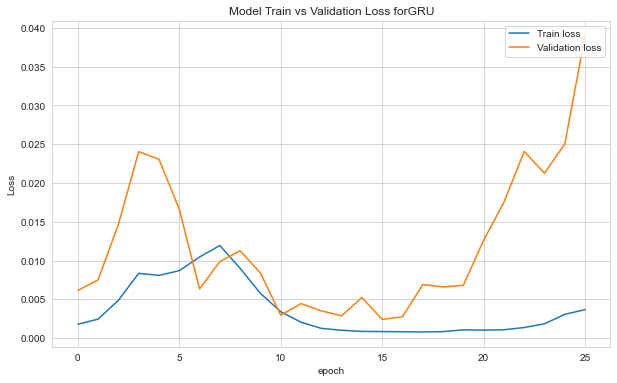

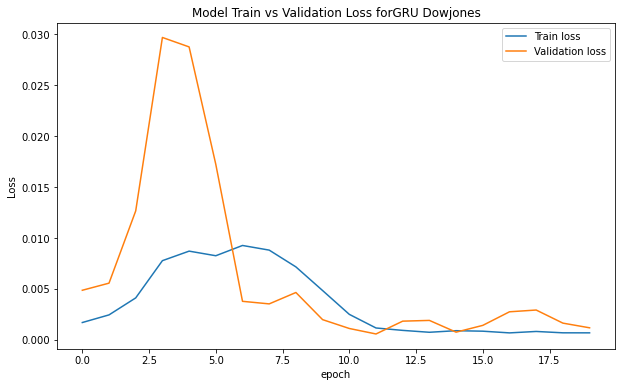

In [35]:
plot_loss(model_gru_dows_fitted, 'GRU Dowjones')

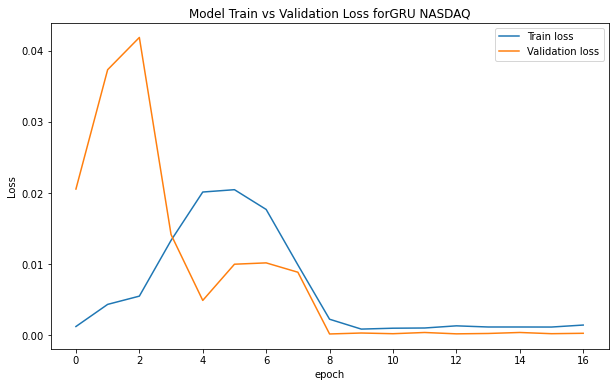

In [36]:
plot_loss(model_gru_nas_fitted, 'GRU NASDAQ')

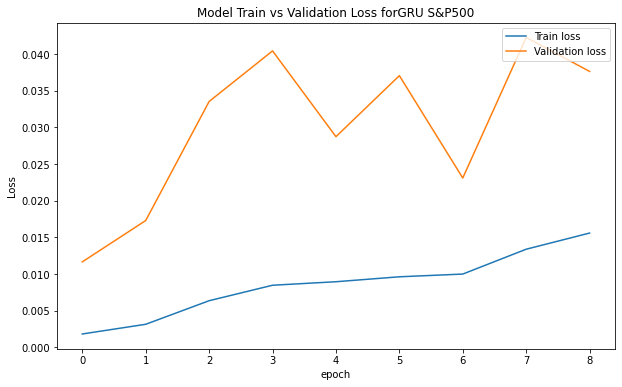

In [37]:
plot_loss(model_gru_sp500_fitted, 'GRU S&P500')

## Making prediction

In [38]:
# Make prediction
def pred(model, X_test,scalar):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction



# Plot test data vs prediction
def plot_pred(prediction, model_name, y_test,df_name):
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(prediction)), np.array(y_test), 
             label='Test   data')
    plt.plot(np.arange(len(prediction)), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend()
#     plt.xlabel()
    plt.ylabel('Value {}'.format(df_name))

In [42]:
pred_gru_dows = pred(model_gru_dow,X_test_dow,scaler_dows)

NameError: name 'scaler' is not defined

In [ ]:
pred_gru_nas = pred(model_gru_nas,X_test_nas,scaler_nas)
pred_gru_sp500 = pred(model_gru_sp500,X_test_sp500,scaler_sp500)

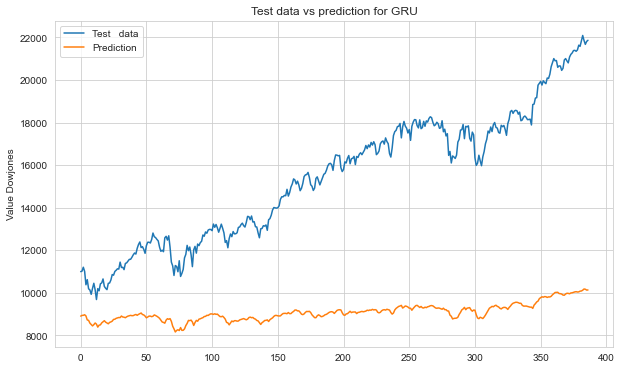

In [ ]:
plot_pred(pred_gru_dows, 'GRU DOwjones', y_test_dow,'Dowjones')

In [ ]:
plot_pred(pred_gru_dows, 'GRU DOwjones', y_test_dow,'Dowjones')

In [ ]:
plot_pred(pred_gru_dows, 'GRU DOwjones', y_test_dow,'Dowjones')

In [ ]:
def evaluate_pred(preds, actual, model_name):
    errors = preds- actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

GRU:
Mean Absolute Error: 6335.2693
Root Mean Square Error: 6901.8978



In [ ]:
evaluate_pred(pred_gru, y_test, 'GRU')